Credit: This session is based heavily on work by Kyle Jero at UWMadison
http://icecube.wisc.edu/~kjero/Bootcamp/2015/Notebooks/Python_Introduction.html

If we want to use libraries and modules not defined within the built-in 
functionality of python we have to import them. There are a number of ways to do this.  For these lessons, we'll do it like this:

In [1]:
import numpy
import pylab
import matplotlib
%matplotlib inline


Imports the module numpy and the module scipy, and creates a reference to that modules in the current namespace. Or in other words, after you’ve run this statement, you can use numpy.name and scipy.name to refer to things defined in module numpy and scipy respectively.

# Numpy

The NumPy (Numeric Python) package provides basic routines for manipulating large arrays and matrices of numeric data.  The first thing we need to know about numpy is that it contains all the standard mathematical functions:

In [2]:
a=0.75
print(numpy.exp(a), numpy.sin(a), numpy.sqrt(a), numpy.cos(a), numpy.arctan(a))

2.117000016612675 0.6816387600233341 0.8660254037844386 0.7316888688738209 0.6435011087932844


The second thing to know about numpy is the NumPy array type. Numpy arrays are similar to lists in Python, except that every element of an array must be of the same type, typically a numeric type like float or int. We came across floats and ints inadvertantly in the last lectures exercise.  A float, like 0.3884 or 5.0 can be a fractional number.  An integer like 5 must be a whole number.  Either can be positive or negative.

Arrays make operations with large amounts of numeric data very fast and are generally much more efficient than lists. An array can be created from a list by using the array function. You can use the second argument to specify what type of data is in the list or leave it out entirely for numpy to decided what kind of data it is.

In [3]:
a = numpy.array([1, 4, 5, 8], float) 
print(a)
print(type(a))
print(a[3])

[1. 4. 5. 8.]
<class 'numpy.ndarray'>
8.0


Arrays can be multidimensional. Unlike lists, different axes are accessed using commas inside bracket notation. Here is an example with a two-dimensional array (aka, a matrix with rows and columns)

In [4]:
a = numpy.array([[1, 2, 3,6], [4, 5, 6,9]], float) 
print(a)
print(a[0,0])
print(a[0,1])

[[1. 2. 3. 6.]
 [4. 5. 6. 9.]]
1.0
2.0


We can ask for the shape of an array to find out how many rows and columns it has:

In [5]:
a.shape

(2, 4)

We can also use slicing just like we did for lists, in 1D or in 2D:

In [6]:
print(a[1,:])
print(a[:,2])
print(a[-1,-2:])

[4. 5. 6. 9.]
[3. 6.]
[6. 9.]


In [9]:
# Create an array with first row 10, 11, 12, second row 21,21,23, third row 31,32,33
# Extract and print:
#   a) the first two elements of the middle row.
#   b) the last column

a = numpy.array([[10,11,12], [21,21,23], [31,32,33]], float)

print(a)

#  Extract and print the first two elements of the middle row
middle_row_first_two = a[1, :2]
print("First two elements of the middle row:", middle_row_first_two)

#  Extract and print the last column
last_column = a[:, -1]
print("Last column:", last_column)



[[10. 11. 12.]
 [21. 21. 23.]
 [31. 32. 33.]]
First two elements of the middle row: [21. 21.]
Last column: [12. 23. 33.]


One of the major advantages of numpy arrays over lists, is that operations
can be applied to all elements at once.  This makes many tedious tasks very 
fast and efficient:

In [10]:

a = numpy.array([1,2,3], float) 
b = numpy.array([5,2,6], float) 
c = 2
print(a+b)
print(a-b)
print(a*b)
print(a/b)
print(a**b)
print(a+c)
print(a-c)
print(a*c)
print(a/c)
print(a**c)


[6. 4. 9.]
[-4.  0. -3.]
[ 5.  4. 18.]
[0.2 1.  0.5]
[  1.   4. 729.]
[3. 4. 5.]
[-1.  0.  1.]
[2. 4. 6.]
[0.5 1.  1.5]
[1. 4. 9.]


Functions that can be applied to a single element are applied element-wise as well.


In [11]:
print(numpy.sqrt(a))
print(numpy.log(a))

[1.         1.41421356 1.73205081]
[0.         0.69314718 1.09861229]


Many operations that can be applied to an entire array are defined

In [12]:
print(numpy.sum(a))
print(numpy.prod(a))
print(numpy.mean(a))
print(numpy.var(a))
print(numpy.argmax(a))

6.0
6.0
2.0
0.6666666666666666
2


To append to an existing array, use the numpy.append command

In [13]:
print("before",a)
a = numpy.append(a,1000)
print("after", a)

before [1. 2. 3.]
after [   1.    2.    3. 1000.]


Just like with lists, we can make automatically generated arrays

In [14]:
print(numpy.arange(0,5))       # like range() for lists
print(numpy.arange(0,5,0.5))   # can specify the step size
print(numpy.linspace(0,2,5))   # this makes a linearly spaced list with 5 elements
print(numpy.ones(10))           # this makes an array with ten 1's

[0 1 2 3 4]
[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5]
[0.  0.5 1.  1.5 2. ]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


An empty array can be defined as follows, and we can append to it later

In [15]:
a=numpy.array([])
print(a)
a=numpy.append(a,5)
a=numpy.append(a,6)
print(a)

[]
[5. 6.]


In [18]:
# Make a numpy array first 30 the fibonacci number ratios
# Calculate the average of the last 15 by slicing the array and applying a numpy function
# print the avarage and the full list of 30 to screen

# Function to calculate Fibonacci numbers
def fibonacci(n):
    fib = [0, 1]
    for i in range(2, n):
        fib.append(fib[i-1] + fib[i-2])
    return fib

# Calculate the first 30 Fibonacci numbers
fibonacci_numbers = fibonacci(30)

# Calculate the ratios of consecutive Fibonacci numbers, starting from the second number
ratios = numpy.array([fibonacci_numbers[i+1] / fibonacci_numbers[i] for i in range(1, len(fibonacci_numbers)-1)])

# Calculate the average of the last 15 ratios
average_last_15 = numpy.mean(ratios[-15:])

# Print the average and the full list of ratios to the screen
print("Average of the last 15 ratios:", average_last_15)
print("Full list of ratios of the first 30 Fibonacci numbers:")
print(ratios)


Average of the last 15 ratios: 1.6180341405400753
Full list of ratios of the first 30 Fibonacci numbers:
[1.         2.         1.5        1.66666667 1.6        1.625
 1.61538462 1.61904762 1.61764706 1.61818182 1.61797753 1.61805556
 1.61802575 1.61803714 1.61803279 1.61803445 1.61803381 1.61803406
 1.61803396 1.618034   1.61803399 1.61803399 1.61803399 1.61803399
 1.61803399 1.61803399 1.61803399 1.61803399]


In [19]:
# Calculate n*(n-1) for all n between 1 and 100 in 2 lines, using numpy arrays

# Create an array of numbers from 1 to 100
n_values = numpy.arange(1, 101)

# Calculate n*(n-1) for each n in the array
result = n_values * (n_values - 1)

print(result)


[   0    2    6   12   20   30   42   56   72   90  110  132  156  182
  210  240  272  306  342  380  420  462  506  552  600  650  702  756
  812  870  930  992 1056 1122 1190 1260 1332 1406 1482 1560 1640 1722
 1806 1892 1980 2070 2162 2256 2352 2450 2550 2652 2756 2862 2970 3080
 3192 3306 3422 3540 3660 3782 3906 4032 4160 4290 4422 4556 4692 4830
 4970 5112 5256 5402 5550 5700 5852 6006 6162 6320 6480 6642 6806 6972
 7140 7310 7482 7656 7832 8010 8190 8372 8556 8742 8930 9120 9312 9506
 9702 9900]


#  Pylab

Matplotlib allows easy plotting of 1 and 2 D graphics. Commonly when we access matplotlib we do so through pylab. Pylab provides a procedural interface to the matplotlib object-oriented plotting library.  Important commands are explained below with examples.

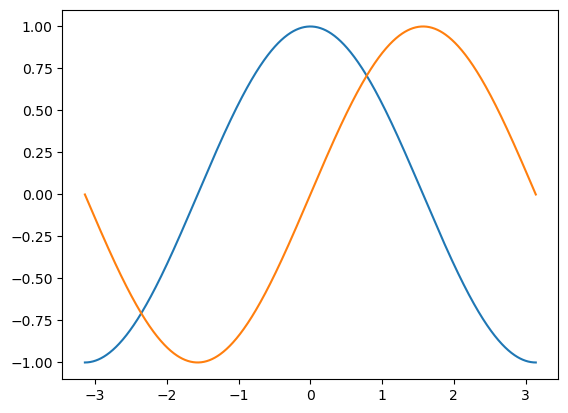

In [20]:
# This code draws plots of cos(x) and sin(x).  The plot command takes a list of x
# values and y values, and plots them against eachoter.

x=numpy.linspace(-numpy.pi,numpy.pi,1000)
c=numpy.cos(x)
s=numpy.sin(x)

pylab.plot(x,c)
pylab.plot(x,s)
pylab.show()


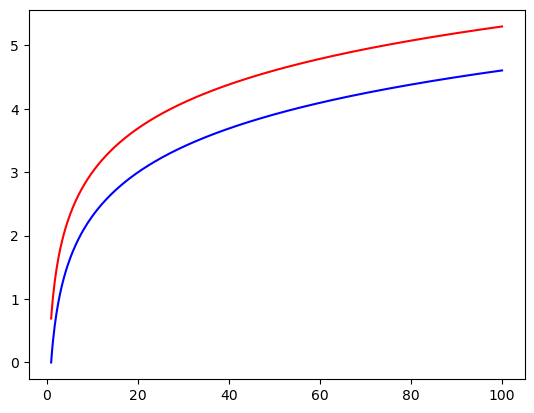

In [25]:
# Draw a plot of log(x) and log(2x) between x=1 and x=100

import numpy as np
import matplotlib.pyplot as plt

# Generate x values from 1 to 100
x = np.linspace(1, 100, 500)  # 500 points between 1 and 100

# Calculate y values for log(x) and log(2x)
y1 = np.log(x)
y2 = np.log(2 * x)

# Plot the functions
pylab.plot(x, y1, label='log(x)', color='blue')
pylab.plot(x, y2, label='log(2x)', color='red')
pylab.show()


Being good scientists we know however that this is far from a good plot, no axis labels, not line labels. Let's fix that.

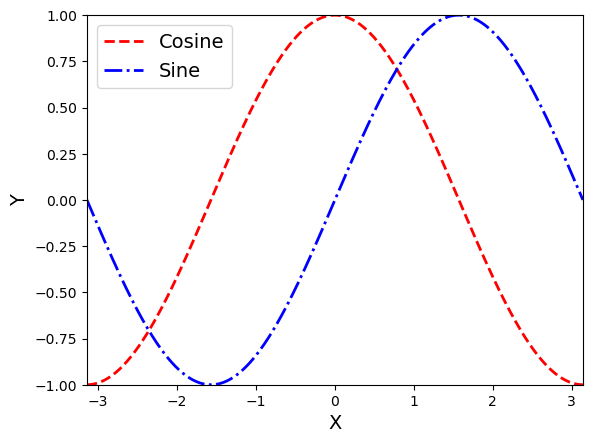

In [24]:
x=numpy.linspace(-numpy.pi,numpy.pi,1000,endpoint=True)
c=numpy.cos(x)
s=numpy.sin(x)

pylab.plot(x,c,label="Cosine",color="r",linestyle="--",linewidth=2)
pylab.plot(x,s,label="Sine",color="b",linestyle="-.",linewidth=2)
pylab.xlabel("X",fontsize=14)
pylab.xlim(-numpy.pi,numpy.pi)
pylab.ylabel("Y",fontsize=14)
pylab.ylim(-1,1)
pylab.legend(fontsize=14,loc=2)
pylab.show()

The other basic plotting tool that is useful if a histogram. Let's generate some random data and make a histogram, again starting with the defaults and building to something that looks very nice.

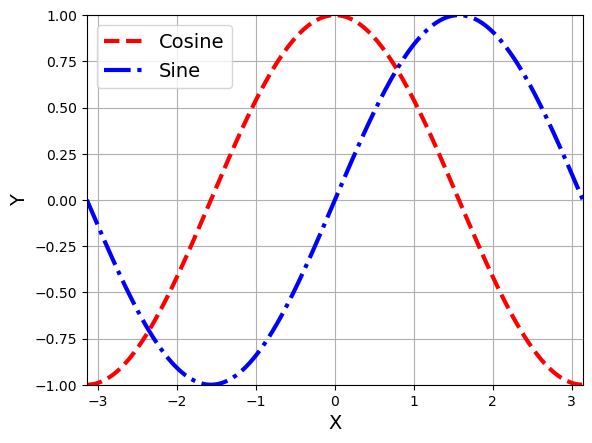

In [28]:
# Make your log plot beautiful


x=numpy.linspace(-numpy.pi,numpy.pi,1000,endpoint=True)
c=numpy.cos(x)
s=numpy.sin(x)

pylab.plot(x,c,label="Cosine",color="r",linestyle="--",linewidth=3)
pylab.plot(x,s,label="Sine",color="b",linestyle="-.",linewidth=3)
pylab.xlabel("X",fontsize=14)
pylab.xlim(-numpy.pi,numpy.pi)
pylab.ylabel("Y",fontsize=14)
pylab.ylim(-1,1)
pylab.legend(fontsize=14,loc=2)
pylab.grid(True)
pylab.show()

The next thing we need to know how to do is histogram.  A histogram is a plot that counts the number of entries in each bin.  For this exercise we'll make some random data, according to poisson distribtuions, to practice with.  Don't worry too much about this line:

In [29]:
import scipy.stats

data1=scipy.stats.poisson.rvs(3,size=1000)
data2=scipy.stats.poisson.rvs(2,size=1000)
data3=scipy.stats.poisson.rvs(1,size=1000)
data4=scipy.stats.poisson.rvs(.1,size=1000)


In [30]:
print(data1[0:10])

[2 6 3 4 4 2 1 3 5 3]


Now we have some datasets we can make histograms.  If you just tell pylab to histogram the data, it make its best guess at how you want it to look:

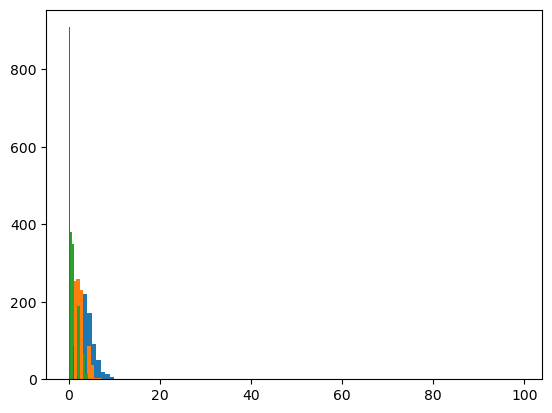

In [38]:
pylab.hist(data1,bins=numpy.arange(0,100,1))
pylab.hist(data2)
pylab.hist(data3)
pylab.hist(data4)

pylab.show()

When matplotlib plots a histogram it makes some decisions about what range to bin the data over and takes 10 bins by default. The result when plotting histograms together over different ranges is something that is difficult to look at. Let's specify the ranges and add a few touches we looked at in the plot example.

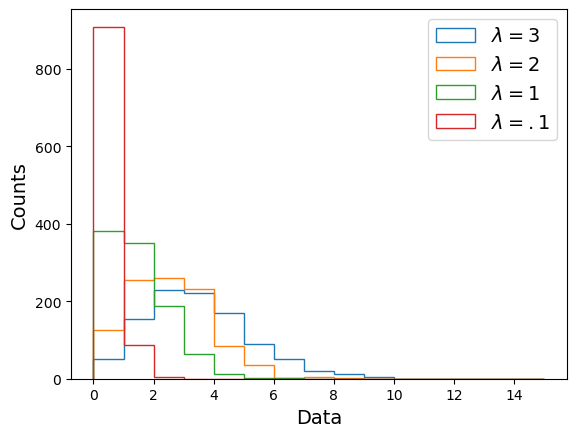

In [32]:
data1=scipy.stats.poisson.rvs(3,size=1000)
data2=scipy.stats.poisson.rvs(2,size=1000)
data3=scipy.stats.poisson.rvs(1,size=1000)
data4=scipy.stats.poisson.rvs(.1,size=1000)

pylab.hist(data1,range=(0,15),bins=15,histtype='step',label=r'$\lambda=3$')
pylab.hist(data2,range=(0,15),bins=15,histtype='step',label=r'$\lambda=2$')
pylab.hist(data3,range=(0,15),bins=15,histtype='step',label=r'$\lambda=1$')
pylab.hist(data4,range=(0,15),bins=15,histtype='step',label=r'$\lambda=.1$')

pylab.xlabel("Data",fontsize=14)
pylab.ylabel("Counts",fontsize=14)
pylab.legend(fontsize=14,loc=1)
pylab.show()

# Exercises

Take a look back at yesterdays plot of the fibonacci spiral.  See if you understand it all.

Text(0.5, 1.0, 'The Golden Spiral')

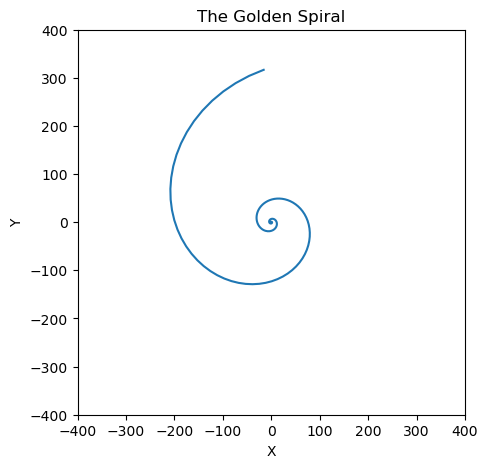

In [33]:
#This was calculated yesterday
golden_ratio=1.618

# Make a list of theta values corresponding to 3 rotations
theta_values = numpy.arange(0, 6*numpy.pi, 0.1)

# A golden spiral has a radius that grows as it rotates,
#  with a rate that depends on the golden ratio:
spiral_growth_factor = numpy.log(golden_ratio)/(numpy.pi/2.)
r_values = numpy.exp(spiral_growth_factor*theta_values)

# Get the x and y values
x_values = r_values * numpy.sin(theta_values)
y_values = r_values * numpy.cos(theta_values)

# make a plot
pylab.figure(figsize=(5,5))
pylab.plot(x_values,y_values)
pylab.xlim(-400,400)
pylab.ylim(-400,400)
pylab.xlabel("X")
pylab.ylabel("Y")
pylab.title("The Golden Spiral")

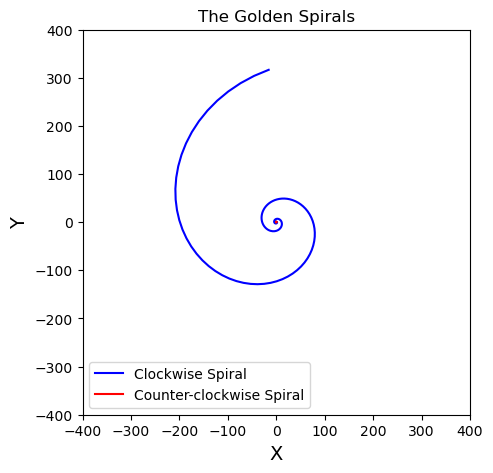

In [41]:
# Add another golden spiral over the top of the first one, spinning the oposite direction

# Golden ratio
golden_ratio = 1.618

# Theta values for 3 rotations
theta_values = numpy.arange(0, 6 * numpy.pi, 0.1)

# Spiral growth factor for the first and second spiral
spiral_growth_factor = numpy.log(golden_ratio) / (numpy.pi / 2)
r_values = numpy.exp(spiral_growth_factor * theta_values)

# X and Y values for both spirals
x_values1 = r_values * numpy.sin(theta_values)
y_values1 = r_values * numpy.cos(theta_values)


x_values2 = r_values_opposite * numpy.sin(-theta_values)
y_values2 = r_values_opposite * numpy.cos(-theta_values)

# Plotting both spirals
pylab.figure(figsize=(5, 5))
pylab.plot(x_values1, y_values1, label='Clockwise Spiral', color='blue')
pylab.plot(x_values2, y_values2, label='Counter-clockwise Spiral', color='red')
pylab.xlim(-400, 400)
pylab.ylim(-400, 400)
pylab.xlabel("X",fontsize=14)
pylab.ylabel("Y", fontsize=14)
pylab.title("The Golden Spirals")
pylab.legend()
pylab.show()


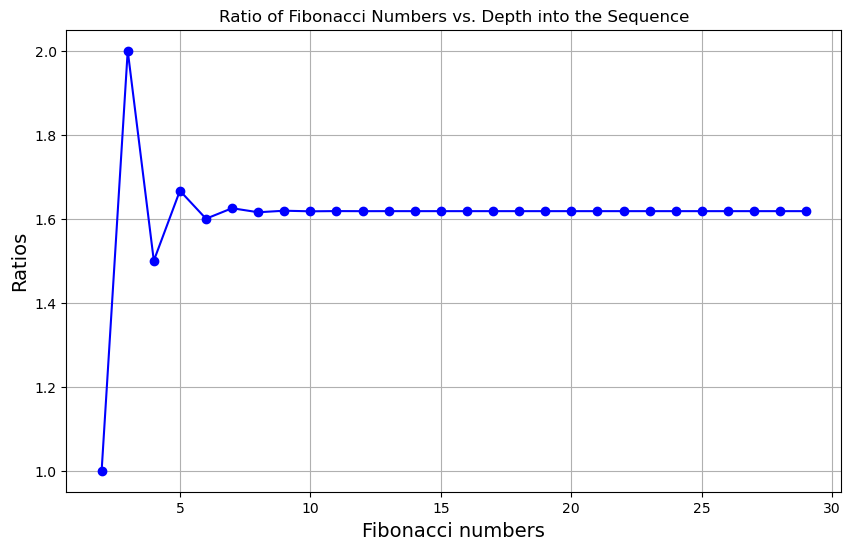

In [46]:
# Plot the ratio of the fibonacci numbers vs the depth into the sequence for the first 30. 

# Function to calculate Fibonacci numbers
def fibonacci(n):
    fib = [0, 1]
    for i in range(2, n):
        fib.append(fib[i-1] + fib[i-2])
    return fib

# Calculate the first 30 Fibonacci numbers
fibonacci_numbers = fibonacci(30)

# Calculate the ratios of consecutive Fibonacci numbers
ratios = numpy.array([fibonacci_numbers[i+1] / fibonacci_numbers[i] for i in range(1, len(fibonacci_numbers)-1)])

# Depth into the sequence (1 to 29 for ratios since the first ratio is between the 1st and 2nd Fibonacci numbers)
depth = numpy.arange(2, 30)

# Plotting the ratios versus the depth into the sequence
pylab.figure(figsize=(10, 6))
pylab.plot(depth, ratios, marker='o', linestyle='-', color='b')
pylab.xlabel('Fibonacci numbers', fontsize=14)
pylab.ylabel('Ratios',fontsize=14)
pylab.title('Ratio of Fibonacci Numbers vs. Depth into the Sequence')
pylab.grid(True)
pylab.show()


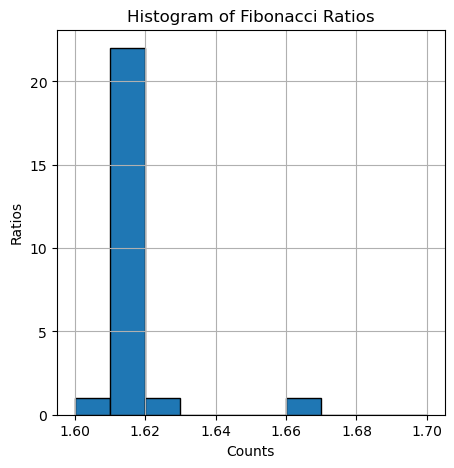

In [45]:
# Histogram the ratios of the first 30 in the sequence.  
# Use bins of width 0.01 between 1.6 and 1.7 for the histogram


# Function to calculate Fibonacci numbers
def fibonacci(n):
    fib = [0, 1]
    for i in range(2, n):
        fib.append(fib[i-1] + fib[i-2])
    return fib

# Calculate the first 30 Fibonacci numbers
fibonacci_numbers = fibonacci(30)

# Calculate the ratios of consecutive Fibonacci numbers
ratios = np.array([fibonacci_numbers[i+1] / fibonacci_numbers[i] for i in range(1, len(fibonacci_numbers)-1)])

# Define the bins for the histogram
bins = np.arange(1.6, 1.71, 0.01)

# Depth into the sequence (1 to 29 for ratios since the first ratio is between the 1st and 2nd Fibonacci numbers)
depth = numpy.arange(2, 30)

# Plotting the histogram
pylab.figure(figsize=(5, 5))
pylab.hist(ratios, bins=bins, edgecolor='black')
pylab.xlabel('Counts')
pylab.ylabel('Ratios')
pylab.title('Histogram of Fibonacci Ratios')
pylab.grid(True)
pylab.show()